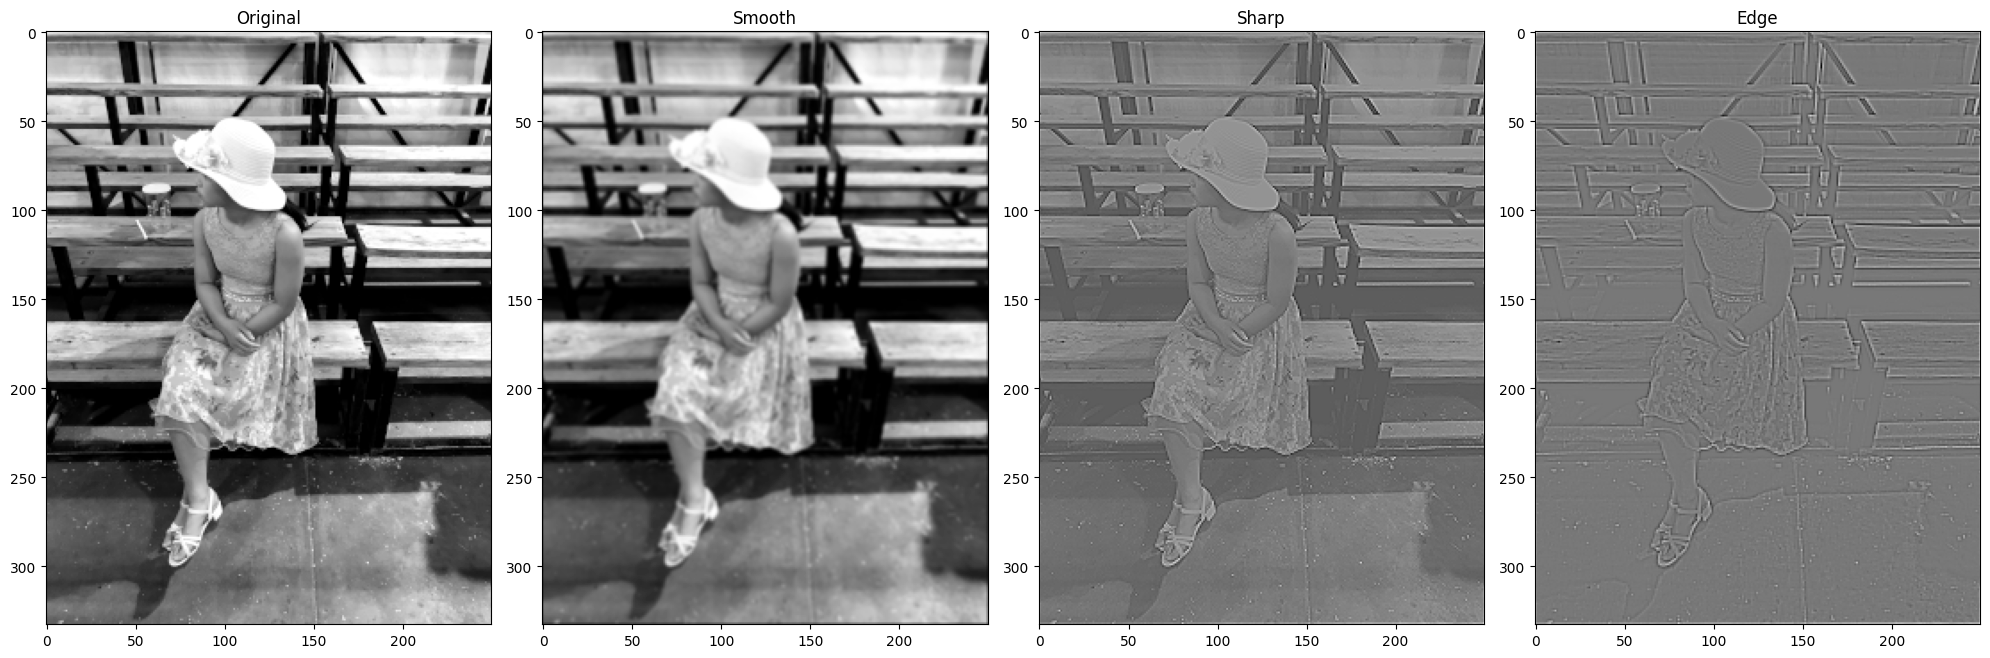

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Read the P2 file
def read_pgm(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    # Remove comments
    lines = [line for line in lines if line[0] != '#']

    # Ensures the file is of P2 type
    assert lines[0].strip() == 'P2'

    # Gather image dimensions and maximum value
    width, height = [int(dim) for dim in lines[1].split()]
    max_val = int(lines[2])

    # Create image array
    image = []
    pixels = lines[3:]
    pixels = " ".join(pixels).split()  # Flatten into one list

    for i in range(0, len(pixels), width):
        row = [int(pixel) for pixel in pixels[i:i+width]]
        image.append(row)

    return image, max_val

# Step 2: Perform manual convolution
def convolve(image, kernel):
    # Dimensions of the image
    i_width = len(image[0])
    i_height = len(image)

    # Dimensions of the kernel
    k_width = len(kernel[0])
    k_height = len(kernel)

    # Ensure the kernel dimensions are odd to have a center to the kernel
    assert k_width % 2 == 1 and k_height % 2 == 1

    # Calculate the amount of padding needed
    pad_x = k_width // 2
    pad_y = k_height // 2

    # Apply padding to the image (0-padding)
    padded_image = [[0] * (i_width + pad_x * 2) for _ in range(i_height + pad_y * 2)]
    for y in range(i_height):
        for x in range(i_width):
            padded_image[y + pad_y][x + pad_x] = image[y][x]

    # Prepare the output image
    output_image = [[0] * i_width for _ in range(i_height)]

    # Convolve
    for y in range(i_height):
        for x in range(i_width):
            acc = 0  # Accumulator
            # Apply the kernel to the neighborhood
            for ky in range(k_height):
                for kx in range(k_width):
                    acc += padded_image[y + ky][x + kx] * kernel[ky][kx]
            output_image[y][x] = acc

    return output_image

# Step 3: Normalize the image
def normalize_image(image, max_val):
    i_width = len(image[0])
    i_height = len(image)

    # Find the minimum and maximum values in the image
    min_val = min([min(row) for row in image])
    max_val_conv = max([max(row) for row in image])

    # Create a new array of the same dimensions as the input image
    new_image = [[0] * i_width for _ in range(i_height)]

    # Normalize the image to the range 0 - max_val
    for y in range(i_height):
        for x in range(i_width):
            new_image[y][x] = int(((image[y][x] - min_val) / (max_val_conv - min_val)) * max_val)

    return new_image

# Define the convolution kernels
smooth_kernel = [[1, 2, 1], [2, 4, 2], [1, 2, 1]]
sharp_kernel = [[0, -1, 0], [-1, 5, -1], [0, -1, 0]]
edge_kernel = [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]

# Load image
image_path = '/content/Girl.pgm'  # please replace with your image path
image, max_val = read_pgm(image_path)

# Apply the convolution operations
smooth_image = convolve(image, smooth_kernel)
sharp_image = convolve(image, sharp_kernel)
edge_image = convolve(image, edge_kernel)

# Normalize the images based on the original max value
smooth_image = normalize_image(smooth_image, max_val)
sharp_image = normalize_image(sharp_image, max_val)
edge_image = normalize_image(edge_image, max_val)

# Display the images
plt.figure(figsize=(20, 10))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=max_val)
plt.title('Original')

plt.subplot(1, 4, 2)
plt.imshow(smooth_image, cmap='gray', vmin=0, vmax=max_val)
plt.title('Smooth')

plt.subplot(1, 4, 3)
plt.imshow(sharp_image, cmap='gray', vmin=0, vmax=max_val)
plt.title('Sharp')

plt.subplot(1, 4, 4)
plt.imshow(edge_image, cmap='gray', vmin=0, vmax=max_val)
plt.title('Edge')

plt.tight_layout()
plt.show()
